<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_5_Preventing_Overfitting_in_FFNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.5. Preventing Overfitting in FFNNs

Overfitting occurs when a neural network performs exceptionally well on the training data but fails to generalize to new, unseen data. This happens because the model memorizes the training data, including noise and irrelevant details, rather than learning general patterns. Preventing overfitting is crucial to building robust models that generalize well across datasets. The following sections will explore various strategies to combat overfitting, including regularization techniques, data augmentation, and cross-validation.



## 1. Regularization Techniques


### 1.1 What Strategies Can Be Employed to Prevent Overfitting in FFNNs?


In order to prevent overfitting, several regularization techniques can be applied during the training process. These methods aim to simplify the model and make it less sensitive to noise and outliers in the training data. The most common regularization techniques include dropout, L2 regularization, and early stopping.



#### Dropout

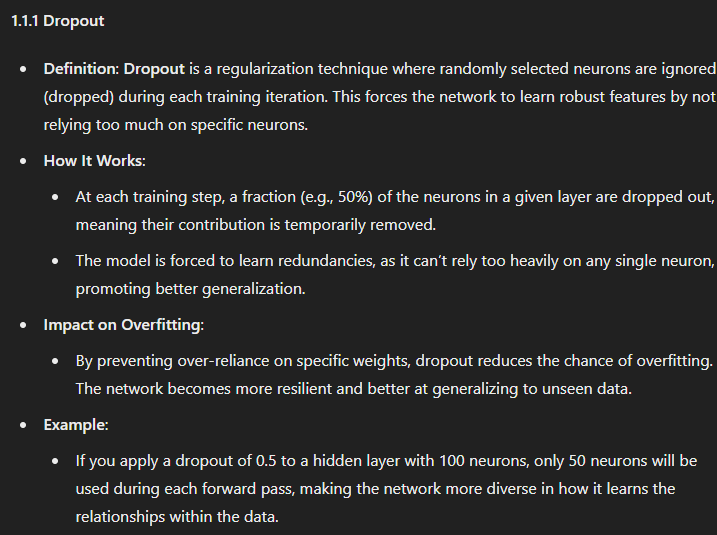

#### L2 Regularization

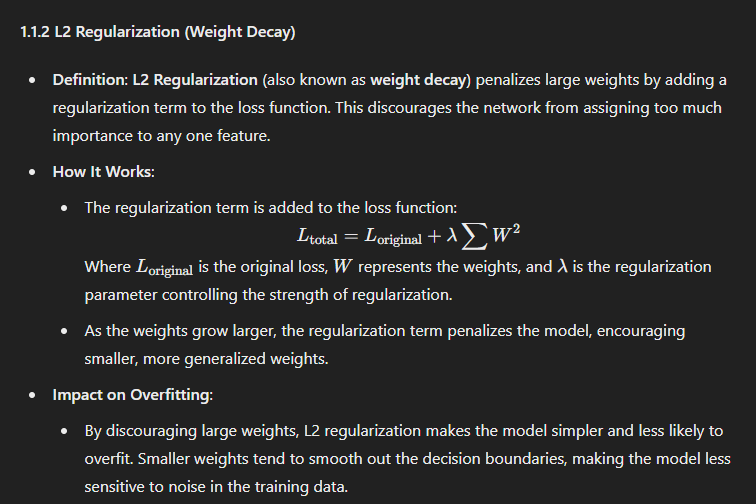

#### Early Stopping

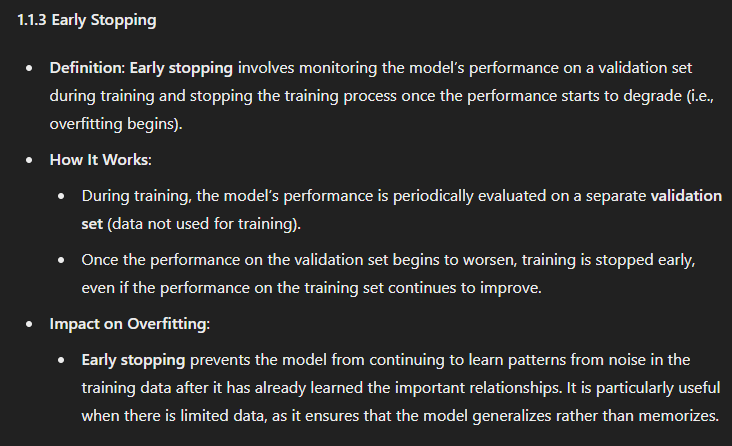

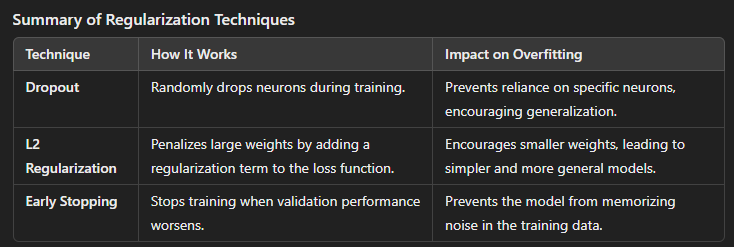

## 2. Data Augmentation and Cross-Validation


### 2.1 How Cross-Validation and Data Augmentation Can Help Improve Model Generalization


In addition to regularization techniques, strategies like data augmentation and cross-validation can significantly improve the generalization ability of a model, especially when dealing with small datasets.



#### Data Augmentation

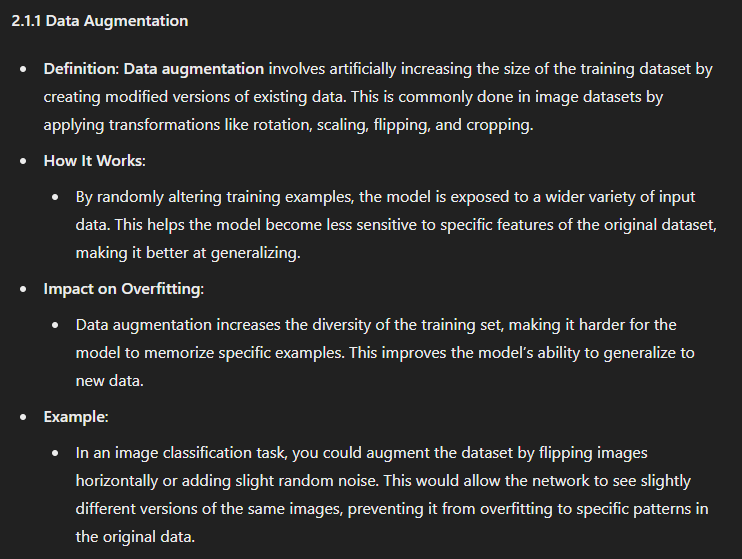

#### Cross validation

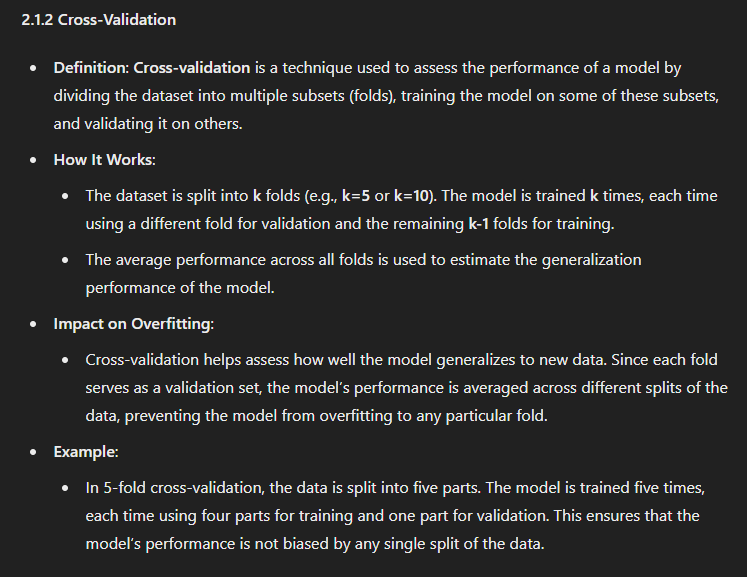

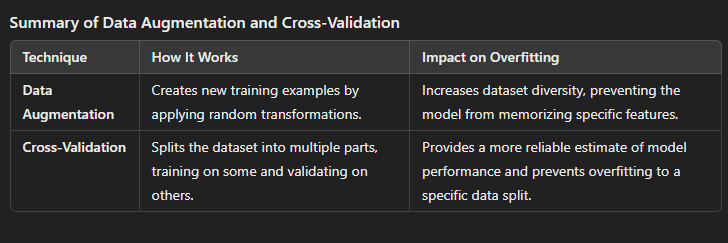

# Observations


## **1. Dropout Prevents Over-reliance on Specific Neurons**
- **Observation**: Dropout helps reduce overfitting by randomly deactivating neurons during training, forcing the network to learn from all neurons rather than over-relying on specific ones.
  
- **Explanation**: Imagine a sports team that over-relies on one player. If that player is injured, the team may struggle. Dropout is like temporarily removing that star player during practice, so the rest of the team has to step up and perform. This makes the team (or neural network) more balanced and prevents over-reliance on any single neuron.



## **2. L2 Regularization Encourages Simpler Models**
- **Observation**: L2 regularization (weight decay) penalizes large weights in the network, encouraging the model to prefer smaller weights and thus simplifying its structure.
  
- **Explanation**: Think of L2 regularization as a way to prevent the model from over-complicating its understanding of the data. By limiting how much it can "invest" in certain features, the model is forced to focus on the most important patterns, rather than trying to memorize every small detail. This results in a simpler, more general model that’s less likely to overfit.


## **3. Early Stopping Prevents Over-training**
- **Observation**: Early stopping halts training once the model’s performance on the validation set starts to deteriorate, which helps avoid overfitting to the training data.
  
- **Explanation**: Early stopping is like quitting a workout when you’re at your peak performance instead of over-exercising and getting injured. Similarly, in neural networks, training past a certain point leads to memorizing the training data (overfitting), and early stopping prevents this by cutting the training short when the model is still performing well.


## **4. Data Augmentation Increases Dataset Diversity**
- **Observation**: Data augmentation artificially increases the size and diversity of the training data by applying random transformations (like rotation, scaling, or flipping in images). This helps reduce overfitting, especially in smaller datasets.
  
- **Explanation**: Imagine you’re learning to recognize cars by looking at photos. If you only see photos of cars from one angle, you might struggle to recognize them from other angles. Data augmentation is like showing you cars from multiple angles and in different lighting conditions, which makes your learning more robust. Similarly, data augmentation exposes the neural network to more variations in the data, helping it generalize better.


## **5. Cross-Validation Provides More Reliable Performance Estimates**
- **Observation**: Cross-validation helps ensure the model's performance is not dependent on a single train-test split. It provides a better estimate of how the model will perform on unseen data.
  
- **Explanation**: Cross-validation is like testing your knowledge by using multiple sets of questions from different exam papers. If you perform well across all the papers, it means you’ve genuinely understood the material. Similarly, cross-validation trains and tests the model on different subsets of the data, giving a more reliable measure of how well the model will generalize to new data.


## **6. Smaller Batch Sizes Can Lead to Faster Convergence, But More Noise**
- **Observation**: Using smaller batch sizes for training can result in faster updates and quicker convergence, but it may introduce more noise in the weight updates, potentially making the learning process less stable.
  
- **Explanation**: Think of smaller batch sizes as getting immediate feedback after every small task instead of waiting for feedback after a big project. You learn faster but may make more mistakes along the way. In neural networks, smaller batches allow the model to update its weights more frequently, but the updates can be noisier, leading to less stable learning.


## **7. Larger Batch Sizes Improve Stability, But Training Takes Longer**
- **Observation**: Larger batch sizes provide more stable and accurate gradient updates because they average out the noise. However, this stability comes at the cost of slower training.
  
- **Explanation**: Larger batch sizes are like making decisions based on feedback from a large group of people. The decision will likely be more reliable, but gathering everyone’s input takes more time. In neural networks, larger batches reduce the chances of making erratic weight updates but slow down the learning process since updates happen less frequently.


## **8. Combining Techniques Yields Better Generalization**
- **Observation**: Regularization techniques like dropout, L2 regularization, and early stopping can be combined with cross-validation and data augmentation to further enhance the generalization ability of FFNNs.
  
- **Explanation**: Preventing overfitting is like building a safety net. Each technique (dropout, regularization, etc.) adds another layer of protection. By using them together, you create a stronger and more reliable system that prevents overfitting and improves performance on new data.


## **9. Regularization Helps in Small Datasets, But May Not Be Necessary for Large Datasets**
- **Observation**: Regularization techniques are particularly useful for smaller datasets, where the model is more prone to overfitting. For very large datasets, overfitting is less of a concern, and regularization may not be as critical.
  
- **Explanation**: Imagine studying for an exam. If you only have a few practice questions (small dataset), you might end up memorizing the answers, which won’t help in the real exam. Regularization prevents this. However, if you have a huge set of questions (large dataset), memorization is less likely, so regularization might not be as important.


## **10. Early Stopping Balances Training and Generalization**
- **Observation**: Early stopping ensures that the model trains long enough to capture the important patterns in the data but prevents it from over-training and memorizing the noise.
  
- **Explanation**: Early stopping is like pacing yourself during a long race. You need to run fast enough to perform well but stop when you’re ahead to avoid burning out. Similarly, in neural networks, training needs to be long enough for the model to learn important features but stopped before it begins to overfit to irrelevant details.


# Demonstrations

## Step 1: Basic FFNN Without Regularization


In [1]:
# Import necessary libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target.reshape(-1, 1)  # Labels: Iris-setosa, Iris-versicolor, Iris-virginica

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a basic Feed Forward Neural Network (FFNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs without regularization
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy without Regularization: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5153 - loss: 1.0143 - val_accuracy: 0.7000 - val_loss: 0.7655
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6227 - loss: 0.7784 - val_accuracy: 0.8000 - val_loss: 0.5815
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8381 - loss: 0.5611 - val_accuracy: 0.9667 - val_loss: 0.4860
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9627 - loss: 0.4871 - val_accuracy: 0.9333 - val_loss: 0.4220
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8958 - loss: 0.4330 - val_accuracy: 0.9667 - val_loss: 0.3902
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9668 - loss: 0.3947 - val_accuracy: 0.9000 - val_loss: 0.3496
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3776 - val_accuracy: 0.9000 - val_loss: 0.3377
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.3115 - val_accuracy: 0.9667 - val_lo

## Step 2: Implementing Dropout

Dropout is a popular regularization technique to reduce overfitting. Let’s add Dropout layers to the same model.



In [2]:
# Define a Feed Forward Neural Network (FFNN) with Dropout
model_with_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% neurons dropped
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% neurons dropped
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Dropout
history_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test)
print(f"Test Accuracy with Dropout: {test_accuracy_dropout:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3122 - loss: 1.5486 - val_accuracy: 0.3000 - val_loss: 1.0018
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4472 - loss: 1.1760 - val_accuracy: 0.4000 - val_loss: 0.8763
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4202 - loss: 1.2829 - val_accuracy: 0.6333 - val_loss: 0.8092
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4082 - loss: 1.1574 - val_accuracy: 0.8667 - val_loss: 0.7350
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4674 - loss: 1.0192 - val_accuracy: 0.8667 - val_loss: 0.6756
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5925 - loss: 0.8906 - val_accuracy: 0.8333 - val_loss: 0.6329
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5286 - loss: 0.8625 - val_accuracy: 0.9333 - val_loss: 0.5825
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 0.9004 - val_accuracy: 0.8333 - val_loss

## Step 3: Implementing L2 Regularization

L2 regularization (also known as weight decay) penalizes large weights, encouraging the model to use smaller weights for better generalization.


In [4]:
# Define a Feed Forward Neural Network (FFNN) with L2 Regularization
model_with_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with L2 Regularization
history_l2 = model_with_l2.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_l2, test_accuracy_l2 = model_with_l2.evaluate(X_test, y_test)
print(f"Test Accuracy with L2 Regularization: {test_accuracy_l2:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3564 - loss: 1.7763 - val_accuracy: 0.4000 - val_loss: 1.5292
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6416 - loss: 1.4690 - val_accuracy: 0.7000 - val_loss: 1.3154
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 1.2966 - val_accuracy: 0.9333 - val_loss: 1.1471
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 1.1170 - val_accuracy: 0.7667 - val_loss: 0.9931
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.9793 - val_accuracy: 0.9000 - val_loss: 0.8799
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8681 - loss: 0.8644 - val_accuracy: 0.9667 - val_loss: 0.7897
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.7600 - val_accuracy: 0.9667 - val_loss: 0.7183
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9433 - loss: 0.7013 - val_accuracy: 0.9000 - val_loss

## Step 4: Implementing Early Stopping


Early stopping monitors the validation loss and stops training when the model begins to overfit (i.e., when validation performance stops improving).



In [5]:
# Define a basic Feed Forward Neural Network (FFNN) for Early Stopping
model_with_early_stopping = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_early_stopping.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history_early_stopping = model_with_early_stopping.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_early_stopping, test_accuracy_early_stopping = model_with_early_stopping.evaluate(X_test, y_test)
print(f"Test Accuracy with Early Stopping: {test_accuracy_early_stopping:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3913 - loss: 1.2189 - val_accuracy: 0.7000 - val_loss: 0.8180
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6923 - loss: 0.8044 - val_accuracy: 0.8333 - val_loss: 0.6943
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.6776 - val_accuracy: 0.7333 - val_loss: 0.5811
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8940 - loss: 0.5608 - val_accuracy: 0.8667 - val_loss: 0.5076
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.4731 - val_accuracy: 0.9333 - val_loss: 0.4520
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8956 - loss: 0.4629 - val_accuracy: 0.7667 - val_loss: 0.4144
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.3971 - val_accuracy: 0.8667 - val_loss: 0.3881
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.3457 - val_accuracy: 0.9667 - val_loss

## Step 5: Implementing Data Augmentation (for Images)

Although data augmentation is more common for images, here’s a general approach if working with image data. In this case, we’ll use TensorFlow’s ImageDataGenerator to apply random transformations like flipping, rotating, or zooming images.



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example Data Augmentation for Image Data (using CIFAR-10 or other datasets)
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    horizontal_flip=True  # Randomly flip images horizontally
)

# Load CIFAR-10 dataset as an example
(X_train_img, y_train_img), (X_test_img, y_test_img) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data (normalize)
X_train_img = X_train_img.astype('float32') / 255
X_test_img = X_test_img.astype('float32') / 255

# One-hot encode the labels
y_train_img = tf.keras.utils.to_categorical(y_train_img, 10)
y_test_img = tf.keras.utils.to_categorical(y_test_img, 10)

# Define a basic CNN model
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using data augmentation
cnn_model.fit(datagen.flow(X_train_img, y_train_img, batch_size=32), epochs=50, validation_data=(X_test_img, y_test_img))

# Evaluate the model
test_loss_aug, test_accuracy_aug = cnn_model.evaluate(X_test_img, y_test_img)
print(f"Test Accuracy with Data Augmentation: {test_accuracy_aug:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.2737 - loss: 1.9294 - val_accuracy: 0.4675 - val_loss: 1.4885
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4438 - loss: 1.5242 - val_accuracy: 0.5247 - val_loss: 1.3155
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4988 - loss: 1.3891 - val_accuracy: 0.5762 - val_loss: 1.1825
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5314 - loss: 1.3126 - val_accuracy: 0.6171 - val_loss: 1.0889
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5480 - loss: 1.2666 - val_accuracy: 0.6171 - val_loss: 1.0781
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5682 - loss: 1.2026 - val_accuracy: 0.6133 - val_loss: 1.0863
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5817 - loss: 1.1811 - val_accuracy: 0.6232 - val_loss: 1.0830
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5899 - loss: 1.15

## Step 6: Implementing Cross-Validation


Cross-validation is an important technique to evaluate a model's ability to generalize to new data. Instead of relying on a single train-test split, cross-validation trains and validates the model across multiple subsets of the data.

Since TensorFlow/Keras doesn't directly support cross-validation like Scikit-learn, we'll use KFold from Scikit-learn to split the data and train the model multiple times.


In [7]:
# Import KFold for cross-validation
from sklearn.model_selection import KFold

# Define the KFold cross-validation
kf = KFold(n_splits=5)

# List to store results from each fold
cross_val_scores = []

# Function to build a simple FFNN model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Build and train the model on the fold
    model_cv = build_model()
    model_cv.fit(X_train_fold, y_train_fold, epochs=50, batch_size=8, verbose=1)

    # Evaluate the model on the validation fold
    loss_cv, accuracy_cv = model_cv.evaluate(X_test_fold, y_test_fold, verbose=0)
    cross_val_scores.append(accuracy_cv)

# Calculate average accuracy across all folds
avg_accuracy = sum(cross_val_scores) / len(cross_val_scores)
print(f"Average Accuracy from Cross-Validation: {avg_accuracy:.4f}")



#Explanation:
# We use KFold cross-validation to split the dataset into 5 different folds and train the model on each fold while testing it on the remaining fold.
# The model's performance is averaged across all 5 folds, which provides a more reliable measure of its generalization capability.



Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4335 - loss: 1.1802   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4905 - loss: 0.8204 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.7222 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7564 - loss: 0.6612 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7747 - loss: 0.6144 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.5643 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8569 - loss: 0.5058 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9249 - loss: 0.4962 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9668 - loss: 0.4398 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.4114 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9757 - loss: 0.3578 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3884 - loss: 1.1417   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.8694 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8287 - loss: 0.6691 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.4766 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9561 - loss: 0.4182 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.4196 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.3167 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 0.3091 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8809 - loss: 0.2971 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9450 - loss: 0.2803 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9609 - loss: 0.2416 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Average Accuracy from Cross-Validation: 0.9000


## Step 7: Implementing L1 Regularization

L1 Regularization adds an absolute value of the weights to the loss function. This results in sparsity, where many weights are driven to zero, simplifying the model and reducing overfitting.



In [ ]:
# Define a Feed Forward Neural Network (FFNN) with L1 Regularization
model_with_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with L1 Regularization
history_l1 = model_with_l1.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_l1, test_accuracy_l1 = model_with_l1.evaluate(X_test, y_test)
print(f"Test Accuracy with L1 Regularization: {test_accuracy_l1:.4f}")


## Step 8: Implementing Batch Normalization


Batch Normalization is another technique to prevent overfitting and speed up convergence. It normalizes the output of each layer to ensure that the inputs to subsequent layers have a mean of 0 and a standard deviation of 1, which helps stabilize the training process.



In [8]:
# Define a Feed Forward Neural Network (FFNN) with Batch Normalization
model_with_bn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Batch Normalization
history_bn = model_with_bn.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_bn, test_accuracy_bn = model_with_bn.evaluate(X_test, y_test)
print(f"Test Accuracy with Batch Normalization: {test_accuracy_bn:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6468 - loss: 0.8407 - val_accuracy: 0.3000 - val_loss: 1.2481
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8775 - loss: 0.3471 - val_accuracy: 0.3000 - val_loss: 1.0501
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9111 - loss: 0.2665 - val_accuracy: 0.3667 - val_loss: 0.9941
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9030 - loss: 0.1983 - val_accuracy: 0.3333 - val_loss: 0.9554
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9669 - loss: 0.1159 - val_accuracy: 0.4000 - val_loss: 0.9265
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1433 - val_accuracy: 0.7667 - val_loss: 0.8717
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8961 - loss: 0.2547 - val_accuracy: 0.7333 - val_loss: 0.8418
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1512 - val_accuracy: 0.7667 - val_loss

## Step 9: Combining Multiple Regularization Techniques


We can also combine multiple regularization techniques like L2 regularization, dropout, and batch normalization for stronger regularization and better generalization.



In [9]:
# Define a Feed Forward Neural Network (FFNN) with Combined Regularization
model_combined = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% neurons dropped
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% neurons dropped
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_combined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Combined Regularization
history_combined = model_combined.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_combined, test_accuracy_combined = model_combined.evaluate(X_test, y_test)
print(f"Test Accuracy with Combined Regularization: {test_accuracy_combined:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4565 - loss: 2.0673 - val_accuracy: 0.3000 - val_loss: 1.7369
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6539 - loss: 1.5426 - val_accuracy: 0.3000 - val_loss: 1.5483
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 1.5891 - val_accuracy: 0.6667 - val_loss: 1.4366
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 1.4827 - val_accuracy: 0.6000 - val_loss: 1.3302
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 1.0051 - val_accuracy: 0.7000 - val_loss: 1.2420
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 1.1072 - val_accuracy: 0.7000 - val_loss: 1.1706
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8238 - loss: 0.9852 - val_accuracy: 0.7000 - val_loss: 1.1089
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.9205 - val_accuracy: 0.7000 - val_loss

## Step 10: Implementing a Learning Rate Schedule

A learning rate schedule reduces the learning rate as training progresses, allowing the model to take larger steps initially and finer steps later, which can help avoid overfitting by allowing better convergence.



In [10]:
# Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

# Define a Feed Forward Neural Network (FFNN) with Learning Rate Schedule
model_with_lr_schedule = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with learning rate schedule
model_with_lr_schedule.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                               loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Learning Rate Schedule
history_lr_schedule = model_with_lr_schedule.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_lr_schedule, test_accuracy_lr_schedule = model_with_lr_schedule.evaluate(X_test, y_test)
print(f"Test Accuracy with Learning Rate Schedule: {test_accuracy_lr_schedule:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5993 - loss: 1.0010 - val_accuracy: 0.7000 - val_loss: 0.5229
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.5204 - val_accuracy: 0.8000 - val_loss: 0.3100
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.3227 - val_accuracy: 1.0000 - val_loss: 0.1765
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9168 - loss: 0.2044 - val_accuracy: 1.0000 - val_loss: 0.1406
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1246 - val_accuracy: 0.8667 - val_loss: 0.1985
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9327 - loss: 0.1358 - val_accuracy: 0.9000 - val_loss: 0.1838
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9034 - loss: 0.2475 - val_accuracy: 0.9667 - val_loss: 0.1163
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.3205 - val_accuracy: 0.8667 - val_loss